## k-Nearest Neighbors - Predicting Car Prices


The goal of this project is to predict a car's market price using its attributes and applying k-nearest neighbors (KNN) algorithm of machine learning (ML). The data contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).


### 1. Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50) 

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names = cols)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


There is no NaN values in the dataframe. However, in the normalized-losses column, there are missing values represented by "?", which we'll have to fix later.
There are 205 entries (cars) in the dataframe.
From 26 columns, we need only numeric ones that can be used as features. Let's determine which columns are numeric from the documentation and keep only them.

In [4]:
cars_num = cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].copy()
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


### 2. Cleaning of data

We noticed that some of missing values are represented by "?". Let's replace the "?" values with NaN in the whole dataframe and double-check it for the presence of missing values again.

In [5]:
#Replacing all '?' to np.nan
cars_num = cars_num.replace('?', np.nan)
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
#Changing the data type of all columns to float
cars_num = cars_num.astype('float')
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [7]:
cars_num.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The normalized-losses column contains most of all missing values.

Because price is the column we want to predict, let's remove any rows with missing price values.

In [8]:
#Removing any rows with missing `price` values.
cars_num = cars_num[cars_num['price'].notnull()]
cars_num.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

We will fill the rest of the missing values with the mean value of each corresponding column.

In [9]:
#Replace missing values in other columns using column means.
cars_num.fillna(value = cars_num.mean(), axis = 0, inplace = True)
cars_num.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Next, we're going to normalize the values in all the numeric columns.

In [10]:
# Normalize all columnns to range from 0 to 1 except the target column.
cars_norm = cars_num[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']].copy()
cars_norm = (cars_norm - cars_norm.mean())/cars_norm.std()

In [11]:
cars_norm['price'] = cars_num['price']
cars_norm.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,201.000000
mean,-2.540809e-17,-1.144911e-14,-1.634072e-14,1.436772e-14,-1.983930e-14,2.640232e-16,-5.468263e-17,-2.831345e-15,1.952722e-14,-4.536172e-16,9.555651e-17,9.903631e-16,4.032153e-17,-1.673620e-16,13207.129353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7947.066342
min,-1.781459e+00,-2.010597e+00,-2.686295e+00,-2.659592e+00,-2.437541e+00,-2.063935e+00,-1.585575e+00,-2.949622e+00,-3.755459e+00,-7.900889e-01,-1.482566e+00,-2.023763e+00,-1.896106e+00,-2.154988e+00,5118.000000
25%,-6.563269e-01,-7.083343e-01,-6.006241e-01,-8.513346e-01,-7.217300e-01,-7.474756e-01,-6.950138e-01,-6.741128e-01,-4.648147e-01,-3.905848e-01,-8.937896e-01,-6.642526e-01,-9.619948e-01,-8.344009e-01,7775.000000
50%,0.000000e+00,-2.962260e-01,-8.123525e-02,-1.851345e-01,1.361755e-01,-2.738596e-01,-1.654909e-01,-7.725788e-02,1.047198e-01,-2.907088e-01,-2.247250e-01,1.902258e-15,-1.835690e-01,-1.007413e-01,10295.000000
75%,4.688049e-01,5.939281e-01,7.546561e-01,3.383084e-01,7.081124e-01,7.159012e-01,3.399628e-01,9.299349e-01,4.844095e-01,-1.908328e-01,3.372892e-01,7.998359e-01,7.505418e-01,4.861863e-01,16500.000000
max,4.187991e+00,3.643530e+00,2.751057e+00,2.907937e+00,2.464776e+00,2.919665e+00,4.792769e+00,2.272859e+00,2.889111e+00,3.204952e+00,4.244626e+00,3.100546e+00,3.708560e+00,3.420825e+00,45400.000000


### 3. Machine learning

We're going to use test/train validation. We'll create both uni- and multivariate KNN models, estimate the error for each case, and select the best model (with the lowest error).

#### 3.1. Univariate k-nearest neighbors model

We will start with creating simple univariate KNN models, one for each numeric column and different k-Neighbors. As an evaluation metric, we'll use RMSE.

In [12]:
# Creating function for univariate k-nearest neighbors model

def knn_train_test(feature_col, target_col, df, k=5):
    df2 = df.copy()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df2.index)
    df2 = df2.reindex(shuffled_index)
    div_index = int(len(df2)/2)
    train = df2.iloc[:div_index]
    test = df2.iloc[div_index:]
    
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train[[feature_col]], train[[target_col]])
    predictions = knn.predict(test[[feature_col]])
    mse = mean_squared_error(test[[target_col]], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [13]:
# Testing the model for diff features and k values
k_values = [1, 3, 5, 7, 9]
feature_col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
target_col = 'price'

feature_k_rmse = {}

for f in feature_col:
    dict_of_rmse = {}
    for k_v in k_values:
        k_rmse = knn_train_test(f, target_col, cars_norm, k=k_v)
        dict_of_rmse[k_v] = k_rmse
    feature_k_rmse[f] = dict_of_rmse
    
feature_k_rmse

{'normalized-losses': {1: 7779.606037519503,
  3: 7480.692360872743,
  5: 7337.2848203845515,
  7: 7795.000930504562,
  9: 7705.82454665913},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.490335934409,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4577.003915399697,
  3: 5087.460276710444,
  5: 5429.644739577333,
  7: 5307.702178308323,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.421075087697,
  5: 4772.510209128695,
  7: 4715.979827895643,
  9: 4736.091903473983},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'engine-size': {1: 3227.659787364569,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  9: 3831.764970642862},
 'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 67

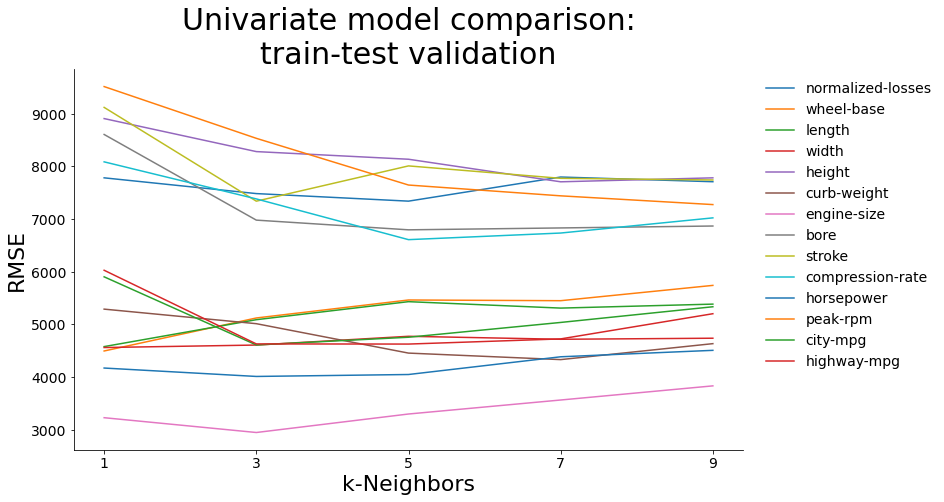

In [14]:
plt.figure(figsize=(12,7))
for k,v in feature_k_rmse.items():
    x = list(v.keys())
    y = list(v.values())    
    plt.plot(x,y)
    
plt.title('Univariate model comparison:\ntrain-test validation', fontsize=30)    
plt.xlabel('k-Neighbors', fontsize=22)
plt.ylabel('RMSE', fontsize=22)
plt.xticks([1,3,5,7,9], fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.legend(feature_k_rmse.keys(), frameon=False, bbox_to_anchor=(1.3, 1), fontsize=14)
plt.show()

The univariate model with engine-size variable performed the best, demonstrating the lowest error and the highest predictive capacity for the price.

#### 3.2. Multivariate k-nearest neighbors model

We'll try different combinations of the best features (with the lowest average RMSE) from the previous step to train and test a multivariate KNN model using the default k value (k=5): 2, 3, 4, and 5 best features:

In [15]:
#Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in feature_k_rmse.items():
    avg_rmse = sum(v.values())/len(v.values())
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3373.460278
horsepower           4223.530357
width                4678.052063
curb-weight          4743.330761
highway-mpg          5040.509230
city-mpg             5126.515991
length               5156.973125
wheel-base           5252.436179
compression-rate     7164.249800
bore                 7213.387243
normalized-losses    7619.681739
stroke               7993.732370
peak-rpm             8078.822375
height               8159.606698
dtype: float64


In [16]:
#Creating function for multivariate k-nearest neighbors model

def knn_train_test2(feature_list, target_col, df, k=5):
    df2 = df.copy()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df2.index)
    df2 = df2.reindex(shuffled_index)
    div_index = int(len(df2)/2)
    train = df2.iloc[:div_index]
    test = df2.iloc[div_index:]

    dict_of_rmse = {}
    k_values = [k]
    
    for k_v in k_values:
        knn = KNeighborsRegressor(n_neighbors = k_v)
        knn.fit(train[feature_list], train[[target_col]])
        predictions = knn.predict(test[feature_list])
        mse = mean_squared_error(test[[target_col]], predictions)
        rmse = np.sqrt(mse)
        dict_of_rmse[k_v] = rmse
    return dict_of_rmse

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test2(
        sorted_features[:nr_best_feats],
        'price',
        cars_norm
    )

k_rmse_results

{'2 best features': {5: 2938.1306900277887},
 '3 best features': {5: 3576.5381752208214},
 '4 best features': {5: 3435.145837075945},
 '5 best features': {5: 3457.4725012114936}}

The models with 2 best features (engine-size, horsepower) got the lowest RMSE=2938.

#### 3.3. Hyperparameter Tuning


Let's tune the hyperparameter k for each of the multivariate models and observe the results.

In [17]:
def knn_train_test3(feature_list, target_col, df, k=5):
    df2 = df.copy()
    np.random.seed(1)
    shuffled_index = np.random.permutation(df2.index)
    df2 = df2.reindex(shuffled_index)
    div_index = int(len(df2)/2)
    train = df2.iloc[:div_index]
    test = df2.iloc[div_index:]

    dict_of_rmse = {}
    k_values = k
    
    for k_v in k_values:
        knn = KNeighborsRegressor(n_neighbors = k_v)
        knn.fit(train[feature_list], train[[target_col]])
        predictions = knn.predict(test[feature_list])
        mse = mean_squared_error(test[[target_col]], predictions)
        rmse = np.sqrt(mse)
        dict_of_rmse[k_v] = rmse
    return dict_of_rmse

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test3(
        sorted_features[:nr_best_feats],
        'price',
        cars_norm,
        k=range(1,11)
    )

k_rmse_results

{'2 best features': {1: 2824.8287076781794,
  2: 2615.442453055988,
  3: 2676.6521480521455,
  4: 2831.7841198370656,
  5: 2938.1306900277887,
  6: 3128.516968715745,
  7: 3204.0554389097565,
  8: 3459.8826047221833,
  9: 3715.847780310613,
  10: 3980.307424292901},
 '3 best features': {1: 3384.9422637192606,
  2: 3261.939437825234,
  3: 3142.577321948092,
  4: 3306.01101075266,
  5: 3576.5381752208214,
  6: 3709.4813226235947,
  7: 3610.411169953427,
  8: 3694.9374649086276,
  9: 3848.9692035290686,
  10: 3973.5807329145964},
 '4 best features': {1: 2734.943456978825,
  2: 3094.990917547735,
  3: 3079.4233224582636,
  4: 3207.401445627884,
  5: 3435.145837075945,
  6: 3644.905717919087,
  7: 3639.209218512767,
  8: 3801.0236825048687,
  9: 3839.0853087451715,
  10: 3966.8524862569284},
 '5 best features': {1: 2497.7039476088817,
  2: 2868.7261658018942,
  3: 3001.7694405929055,
  4: 3271.795489709763,
  5: 3457.4725012114936,
  6: 3666.511816712202,
  7: 3636.3673115750908,
  8: 3847.

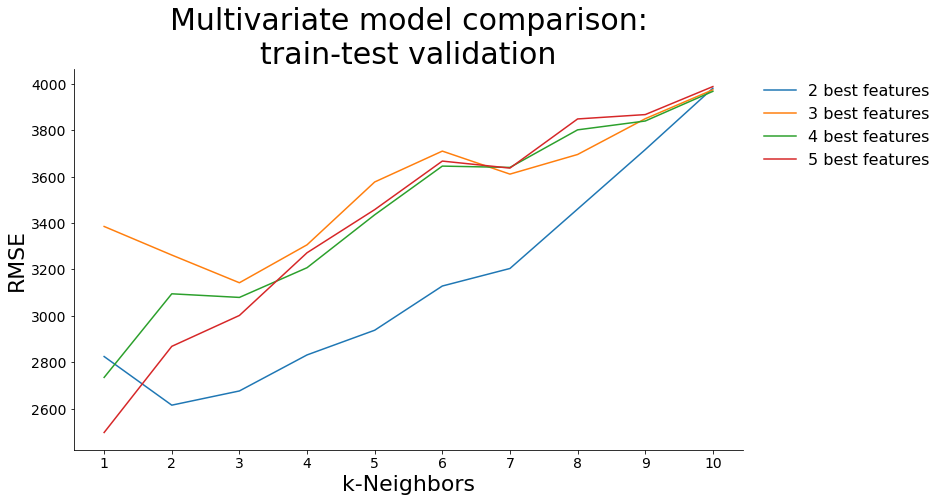

In [18]:
plt.figure(figsize=(12,7))
for k,v in sorted(k_rmse_results.items()):
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))

plt.title('Multivariate model comparison:\ntrain-test validation', fontsize=30)    
plt.xlabel('k-Neighbors', fontsize=22)
plt.ylabel('RMSE', fontsize=22)
plt.xticks(range(1,11), fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.legend(k_rmse_results.keys(), frameon=False, bbox_to_anchor=(1.3, 1), fontsize=16)
plt.show()

### Conclusion

In this project, we used the KNN algorithm, to create uni- and multivariate ML models for predicting a car's market price. We tried different features, their combinations and diffrent number nearest neighbors. The main idea was to reduce the error of prediction on the test data and to ensure model feasibility for future unknown data.

The lowest RMSE is related to the multivariate model with 5 features and k=1. However, considering too few nearest neighbors leads to the noise influence. A safer choice is the second best multivariate model with engine-size and horsepower, 2-3 k-Neighbors and RMSE = 2615 and 2676, respectively.